In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

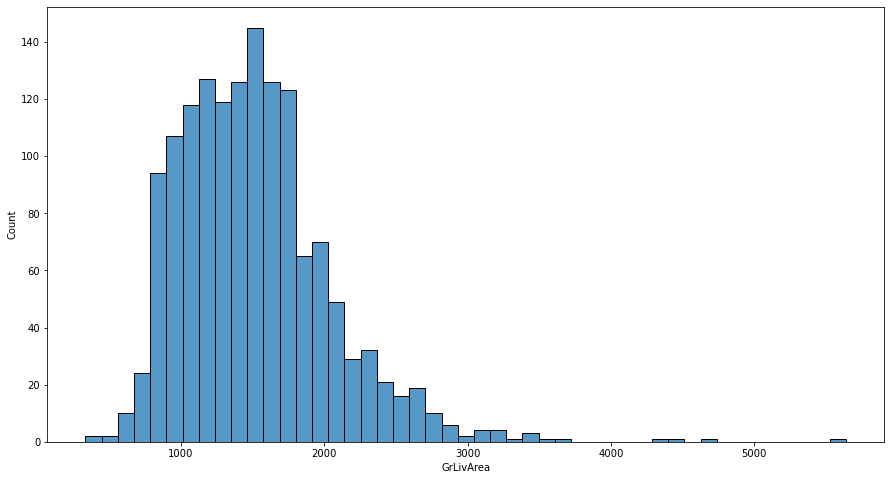

In [4]:
#Chechking the distribution of the LotAreas
plt.figure(figsize=[15,8])
sns.histplot(df['GrLivArea']);

In [5]:
df = df.loc[df['GrLivArea'] <= 4000,:]

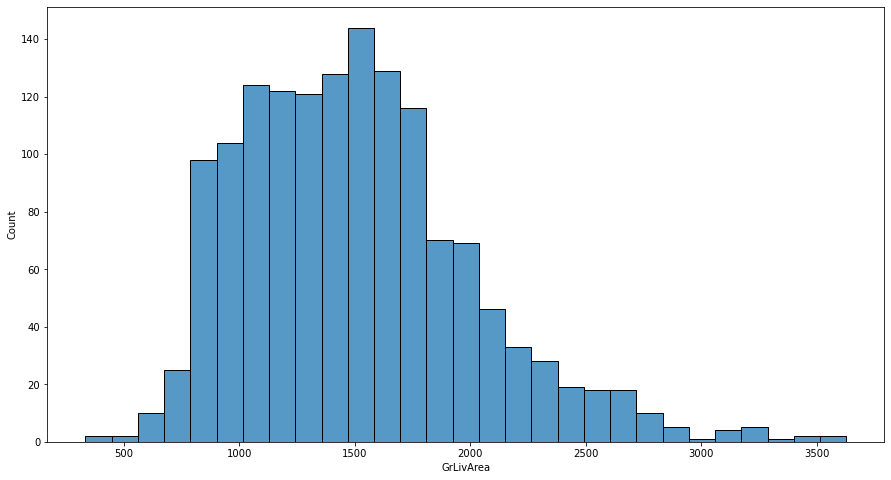

In [6]:
#Better Distribution of Data
plt.figure(figsize=[15,8])
sns.histplot(df['GrLivArea']);

In [7]:
df.shape
#There are so many variables in the dataset so we will start with the most important ones.

(1456, 81)

In [8]:
smaller_df = df.loc[:,["MSSubClass","LotFrontage","LotArea","Street","OverallQual","OverallCond","YearBuilt","YearRemodAdd","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd"]

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_12260/4000825434.py, line 1)

In [9]:
df.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [10]:
#lets Start with the numeric columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)

In [11]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1456 non-null   int64  
 1   MSSubClass     1456 non-null   int64  
 2   LotFrontage    1197 non-null   float64
 3   LotArea        1456 non-null   int64  
 4   OverallQual    1456 non-null   int64  
 5   OverallCond    1456 non-null   int64  
 6   YearBuilt      1456 non-null   int64  
 7   YearRemodAdd   1456 non-null   int64  
 8   MasVnrArea     1448 non-null   float64
 9   BsmtFinSF1     1456 non-null   int64  
 10  BsmtFinSF2     1456 non-null   int64  
 11  BsmtUnfSF      1456 non-null   int64  
 12  TotalBsmtSF    1456 non-null   int64  
 13  1stFlrSF       1456 non-null   int64  
 14  2ndFlrSF       1456 non-null   int64  
 15  LowQualFinSF   1456 non-null   int64  
 16  GrLivArea      1456 non-null   int64  
 17  BsmtFullBath   1456 non-null   int64  
 18  BsmtHalf

In [12]:
newdf["LotFrontage"].sort_values()

1039    21.0
1291    21.0
1038    21.0
915     21.0
232     21.0
        ... 
1429     NaN
1431     NaN
1441     NaN
1443     NaN
1446     NaN
Name: LotFrontage, Length: 1456, dtype: float64

In [13]:
newdf['LotFrontage'].fillna(0.0, inplace=True)

C:\Users\yakup\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [14]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1456 non-null   int64  
 1   MSSubClass     1456 non-null   int64  
 2   LotFrontage    1456 non-null   float64
 3   LotArea        1456 non-null   int64  
 4   OverallQual    1456 non-null   int64  
 5   OverallCond    1456 non-null   int64  
 6   YearBuilt      1456 non-null   int64  
 7   YearRemodAdd   1456 non-null   int64  
 8   MasVnrArea     1448 non-null   float64
 9   BsmtFinSF1     1456 non-null   int64  
 10  BsmtFinSF2     1456 non-null   int64  
 11  BsmtUnfSF      1456 non-null   int64  
 12  TotalBsmtSF    1456 non-null   int64  
 13  1stFlrSF       1456 non-null   int64  
 14  2ndFlrSF       1456 non-null   int64  
 15  LowQualFinSF   1456 non-null   int64  
 16  GrLivArea      1456 non-null   int64  
 17  BsmtFullBath   1456 non-null   int64  
 18  BsmtHalf

In [15]:
newdf.MasVnrArea.value_counts()

0.0      860
72.0       8
108.0      8
180.0      8
120.0      7
        ... 
261.0      1
748.0      1
259.0      1
209.0      1
119.0      1
Name: MasVnrArea, Length: 324, dtype: int64

In [16]:
df.loc[1278,["MasVnrType"]]

MasVnrType    NaN
Name: 1278, dtype: object

In [17]:
newdf['MasVnrArea'].fillna(0, inplace=True)

In [18]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1456 non-null   int64  
 1   MSSubClass     1456 non-null   int64  
 2   LotFrontage    1456 non-null   float64
 3   LotArea        1456 non-null   int64  
 4   OverallQual    1456 non-null   int64  
 5   OverallCond    1456 non-null   int64  
 6   YearBuilt      1456 non-null   int64  
 7   YearRemodAdd   1456 non-null   int64  
 8   MasVnrArea     1456 non-null   float64
 9   BsmtFinSF1     1456 non-null   int64  
 10  BsmtFinSF2     1456 non-null   int64  
 11  BsmtUnfSF      1456 non-null   int64  
 12  TotalBsmtSF    1456 non-null   int64  
 13  1stFlrSF       1456 non-null   int64  
 14  2ndFlrSF       1456 non-null   int64  
 15  LowQualFinSF   1456 non-null   int64  
 16  GrLivArea      1456 non-null   int64  
 17  BsmtFullBath   1456 non-null   int64  
 18  BsmtHalf

In [19]:
newdf.GarageYrBlt.sort_values()

93      1900.0
653     1906.0
848     1908.0
740     1910.0
246     1910.0
         ...  
1349       NaN
1407       NaN
1449       NaN
1450       NaN
1453       NaN
Name: GarageYrBlt, Length: 1456, dtype: float64

In [20]:
newdf["GarageYrBlt"].fillna(0, inplace=True)

In [21]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1456 non-null   int64  
 1   MSSubClass     1456 non-null   int64  
 2   LotFrontage    1456 non-null   float64
 3   LotArea        1456 non-null   int64  
 4   OverallQual    1456 non-null   int64  
 5   OverallCond    1456 non-null   int64  
 6   YearBuilt      1456 non-null   int64  
 7   YearRemodAdd   1456 non-null   int64  
 8   MasVnrArea     1456 non-null   float64
 9   BsmtFinSF1     1456 non-null   int64  
 10  BsmtFinSF2     1456 non-null   int64  
 11  BsmtUnfSF      1456 non-null   int64  
 12  TotalBsmtSF    1456 non-null   int64  
 13  1stFlrSF       1456 non-null   int64  
 14  2ndFlrSF       1456 non-null   int64  
 15  LowQualFinSF   1456 non-null   int64  
 16  GrLivArea      1456 non-null   int64  
 17  BsmtFullBath   1456 non-null   int64  
 18  BsmtHalf

In [22]:
newdf.describe

<bound method NDFrame.describe of         Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0  

In [23]:
newdf.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.00000,1456.000000,1456.000000,1456.000000,...,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,729.967033,56.888736,57.296016,10448.784341,6.088599,5.576236,1971.18544,1984.819368,101.526786,436.991071,...,93.833791,46.221154,22.014423,3.418956,15.102335,2.055632,43.608516,6.326236,2007.817308,180151.233516
std,421.722909,42.358363,33.877802,9860.763449,1.369669,1.113966,30.20159,20.652143,177.011773,430.255052,...,125.192349,65.352424,61.192248,29.357056,55.828405,35.383772,496.799265,2.698356,1.329394,76696.592530
min,1.000000,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.00000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,364.750000,20.000000,42.000000,7538.750000,5.000000,5.000000,1954.00000,1966.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,730.500000,50.000000,63.000000,9468.500000,6.000000,5.000000,1972.00000,1993.500000,0.000000,381.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1094.250000,70.000000,79.000000,11588.000000,7.000000,6.000000,2000.00000,2004.000000,163.250000,706.500000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.00000,2010.000000,1600.000000,2188.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,625000.000000


<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

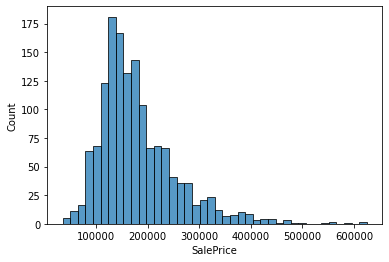

In [24]:
sns.histplot(newdf.SalePrice)

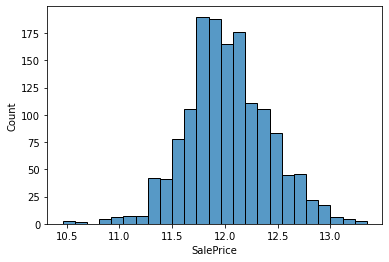

In [25]:
sns.histplot(np.log(newdf.SalePrice), bins=25);

In [26]:
X =  []
for i in newdf.columns:
    X.append(i)

In [27]:
X.pop(-1)

'SalePrice'

In [28]:
x = newdf.loc[:,X]

In [29]:
Y = newdf.SalePrice

In [30]:
# Değişkenlerin tanımlaması
#y, X = patsy.dmatrices('Y ~ X1 + X2 + X3 + X4 + X5 + X6', data=newdf, return_type="dataframe")

# Modeli Oluşturma
model = sm.OLS(Y, x)

# Modeli Eğitme
fit = model.fit()

# Oluşturduğumuz modele ilişkin özet tablosunu görüntüleme
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              2017.
Date:                Sat, 14 Jan 2023   Prob (F-statistic):                        0.00
Time:                        13:52:25   Log-Likelihood:                         -16949.
No. Observations:                1456   AIC:                                  3.397e+04
Df Residuals:                    1421   BIC:                                  3.415e+04
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Id               -0.4236      1.753     -0.242      0.809      -3.862       3.015
MSSubClass     -109.7073     21.505     -5.101      0.000    -151.892     -67.522
LotFrontage      73.7215     23.333      3.160      0.002      27.951     119.492
LotArea           0.5638      0.081      6.965      0.000       0.405       0.723
OverallQual    1.462e+04    960.836     15.216      0.000    1.27e+04    1.65e+04
OverallCond    5404.8654    826.720      6.538      0.000    3783.142    7026.589
YearBuilt       375.3956     48.745      7.701      0.000     279.775     471.016
YearRemodAdd    154.7475     53.418      2.897      0.004      49.960     259.535
MasVnrArea       27.3970      4.825      5.678      0.000      17.933      36.861
BsmtFinSF1       20.5980      2.112      9.755      0.000      16.456      24.740
BsmtFinSF2        0.1427      3.614      0.039      0.969      -6.947       7.233
BsmtUnfSF        -0.2316      1.934     -0.120      0.905      -4.026       3.563
TotalBsmtSF      20.5091      2.768      7.411      0.000      15.080      25.938
1stFlrSF         23.2891      4.945      4.710      0.000      13.589      32.989
2ndFlrSF         26.1252      4.625      5.649      0.000      17.053      35.197
LowQualFinSF    -18.3844     11.919     -1.542      0.123     -41.765       4.996
GrLivArea        31.0299      4.582      6.772      0.000      22.042      40.018
BsmtFullBath   1347.8677   2124.707      0.634      0.526   -2820.031    5515.766
BsmtHalfBath  -5423.8711   3296.118     -1.646      0.100   -1.19e+04    1041.909
FullBath      -1228.2225   2270.123     -0.541      0.589   -5681.375    3224.930
HalfBath      -1824.2664   2138.165     -0.853      0.394   -6018.566    2370.033
BedroomAbvGr  -1.256e+04   1363.316     -9.215      0.000   -1.52e+04   -9888.064
KitchenAbvGr  -1.812e+04   4195.596     -4.320      0.000   -2.64e+04   -9892.825
TotRmsAbvGrd   5223.3125   1003.192      5.207      0.000    3255.415    7191.210
Fireplaces     2260.1783   1427.385      1.583      0.114    -539.830    5060.186
GarageYrBlt     -12.0915      2.170     -5.572      0.000     -16.348      -7.835
GarageCars     7001.3655   2436.453      2.874      0.004    2221.935    1.18e+04
GarageArea       22.1291      7.916      2.796      0.005       6.601      37.657
WoodDeckSF       16.6997      6.425      2.599      0.009       4.096      29.303
OpenPorchSF      23.2806     12.237      1.902      0.057      -0.724      47.286
EnclosedPorch    10.6216     13.530      0.785      0.433     -15.920      37.163
3SsnPorch        11.9233     25.163      0.474      0.636     -37.438      61.284
ScreenPorch      41.9346     13.833      3.032      0.002      14.800      69.069
PoolArea          3.6256     21.

In [113]:
df2 = pd.read_csv("test.csv")

In [114]:
df2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [31]:
fit.predict()

array([225969.07164396, 190532.47992704, 219593.31227849, ...,
       231641.33407265, 126525.11457062, 156392.95041329])